In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV


from sklearn.inspection import permutation_importance

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import accuracy_score 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from nose.tools import assert_equal, assert_is_instance, assert_is_not
from numpy.testing import assert_array_equal, assert_array_almost_equal, assert_almost_equal
from pandas.util.testing import assert_frame_equal


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.


In [3]:
# Step 1: Clean and prepare your data: 

# import training data
df = pd.read_csv("hotel_bookings.csv")

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

In [8]:
# value count of variable 'hotel'
df['hotel'].value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


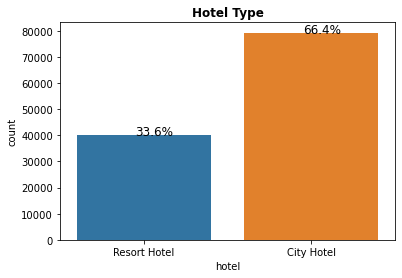

In [9]:
# Create a countplot based on hotel type  
plt.title('Hotel Type', weight='bold')
ax= sns.countplot('hotel', data=df)
without_hue(ax,df['hotel'])

Text(0.5, 1.0, 'Canceled Situation')

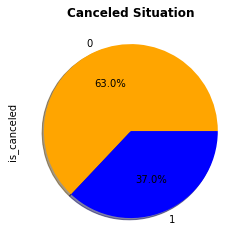

In [10]:
#Create a Piechart based on cancel situation column 
cols = ['orange','blue']
df['is_canceled'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, colors=cols)
plt.title('Canceled Situation', weight='bold')

<AxesSubplot:title={'center':'Hotel Type vs Cancelation'}, xlabel='count', ylabel='hotel'>

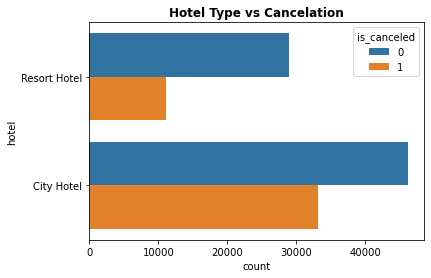

In [11]:
#Create a countplot based on hotel type and cancel situation column
plt.title('Hotel Type vs Cancelation', weight='bold')
sns.countplot(y='hotel', hue='is_canceled', data=df)
 

In [12]:
df['lead_time'].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

Text(0, 0.5, 'Lead Time')

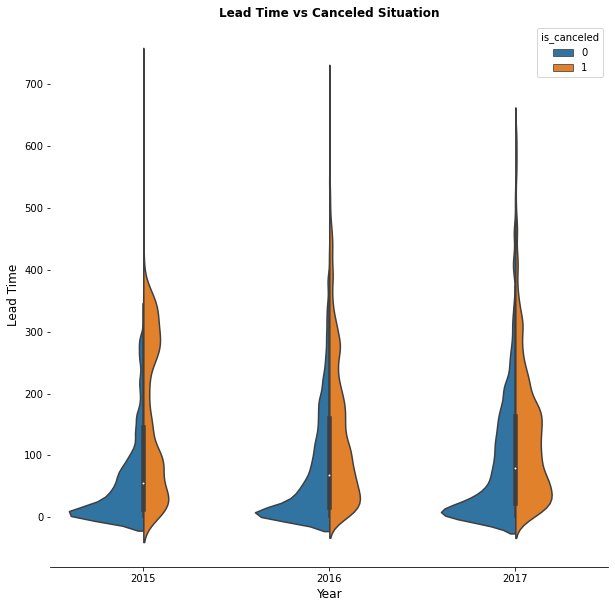

In [13]:
#Arrival Year vs Lead Time vs Canceled Situation
plt.figure(figsize=(10,10))
sns.violinplot(x='arrival_date_year', y ='lead_time', hue="is_canceled", data=df,split = True )
sns.despine(left=True)
plt.title('Lead Time vs Canceled Situation', weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Lead Time', fontsize=12)

In [14]:
df['arrival_date_month'].value_counts()

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

Text(0.5, 1.0, 'Arrival Month')

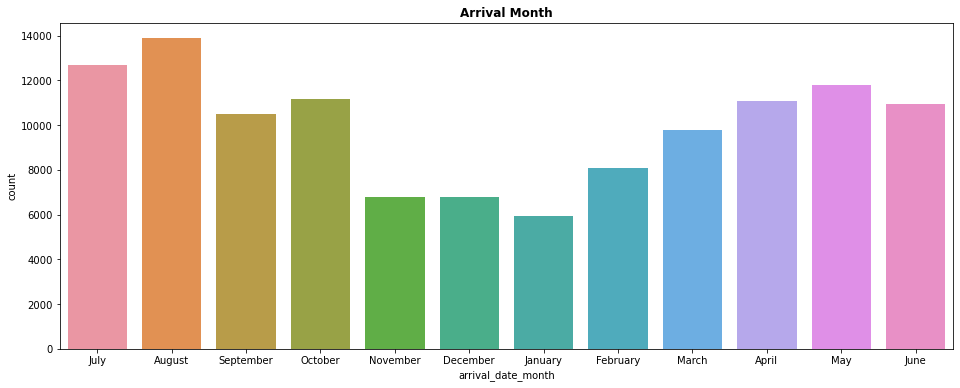

In [15]:
#Create a countplot based on arrival_date_month column
plt.figure(figsize=(16,6))
sns.countplot(x='arrival_date_month',data=df,)
plt.title('Arrival Month', weight='bold')

Text(0.5, 1.0, 'Lead Time vs Arrival Month')

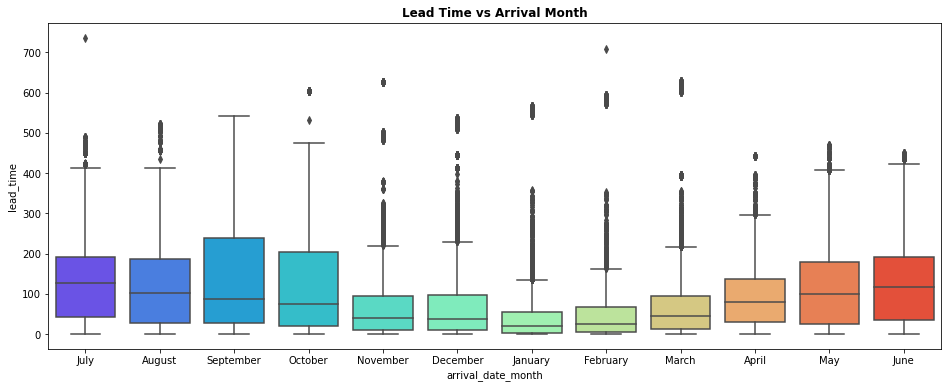

In [16]:
#Create a boxplot based on arrival_date_month and lead_time column
plt.figure(figsize=(16,6))
sns.boxplot(x='arrival_date_month',y='lead_time',data=df,palette='rainbow')
plt.title('Lead Time vs Arrival Month', weight='bold')

Text(0.5, 1.0, 'Lead Time vs Canceled Situation ')

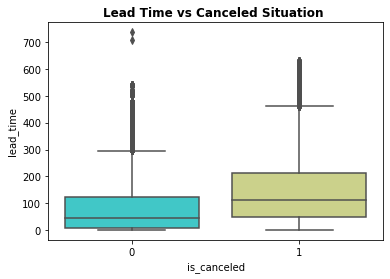

In [17]:
 #Create a boxplot based on Canceled Situation and lead_time column
sns.boxplot(x='is_canceled',y='lead_time',data=df,palette='rainbow')
plt.title('Lead Time vs Canceled Situation ', weight='bold')

Text(0.5, 1.0, 'Lead Time vs Hotel Type ')

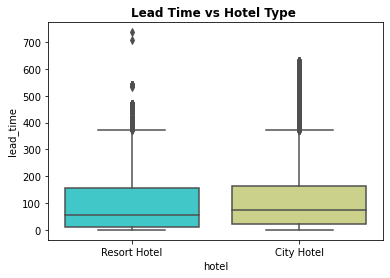

In [18]:
 #Create a boxplot based on hotel type and lead_time column
sns.boxplot(x='hotel',y='lead_time',data=df,palette='rainbow')
plt.title('Lead Time vs Hotel Type ', weight='bold')

In [19]:
d = {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
         'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}
    
    #Create new column month with int value
df['month'] = df['arrival_date_month'].map(d)
 

In [20]:
df.rename(columns={'arrival_date_year': 'year', 
                       'arrival_date_day_of_month': 'day'}, inplace=True)
df['arrival_date'] = pd.to_datetime(df[['year', 'month' , 'day']])

In [21]:
df['stays_in_weekend_nights'].value_counts()

0     51998
2     33308
1     30626
4      1855
3      1259
6       153
5        79
8        60
7        19
9        11
10        7
12        5
13        3
16        3
14        2
18        1
19        1
Name: stays_in_weekend_nights, dtype: int64

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stays_in_weekend_nights', ylabel='Density'>

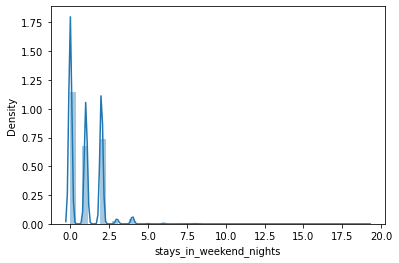

In [22]:
sns.distplot(df['stays_in_weekend_nights'], hist = True)

In [23]:
df['stays_in_week_nights'].value_counts()

2     33684
1     30310
3     22258
5     11077
4      9563
0      7645
6      1499
10     1036
7      1029
8       656
9       231
15       85
11       56
19       44
12       42
20       41
14       35
13       27
16       16
21       15
22        7
18        6
25        6
30        5
17        4
24        3
40        2
26        1
32        1
33        1
34        1
35        1
41        1
42        1
50        1
Name: stays_in_week_nights, dtype: int64

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='stays_in_week_nights', ylabel='Density'>

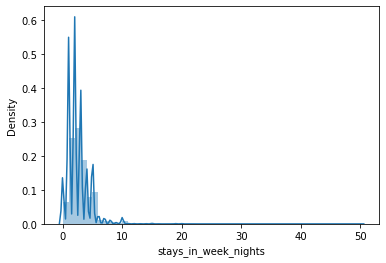

In [24]:
 
sns.distplot(df['stays_in_week_nights'], hist = True)

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


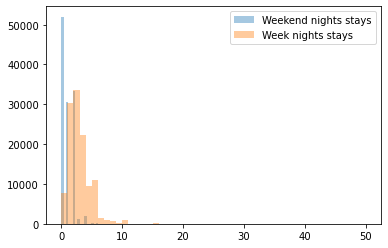

In [25]:

sns.distplot(df['stays_in_weekend_nights'],label="Weekend nights stays",axlabel=False, kde=False)
sns.distplot(df['stays_in_week_nights'],label="Week nights stays",axlabel=False, kde=False)
plt.legend()

In [26]:
df['stays_total']= df['stays_in_week_nights']+df['stays_in_weekend_nights']

<AxesSubplot:xlabel='stays_total', ylabel='Density'>

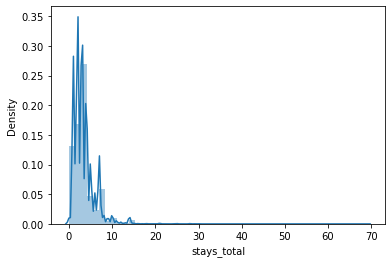

In [27]:
sns.distplot(df['stays_total'], hist = True)

In [28]:
df['stays_total'].describe()

count    119390.000000
mean          3.427900
std           2.557439
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max          69.000000
Name: stays_total, dtype: float64

<AxesSubplot:xlabel='stays_total', ylabel='hotel'>

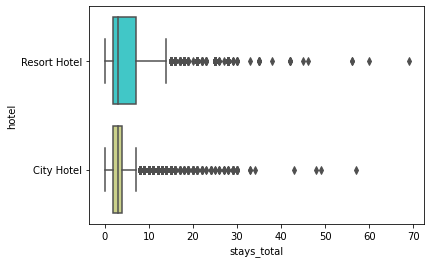

In [29]:
sns.boxplot(x='stays_total',y='hotel',data=df,palette='rainbow')

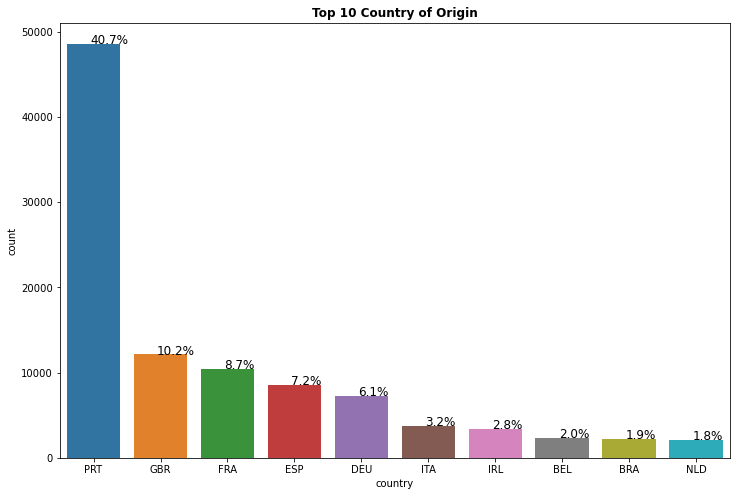

In [30]:
#Create a boxplot based on country column
plt.figure(figsize=(12,8))
plt.title('Top 10 Country of Origin', weight='bold')
ax= sns.countplot(x='country', data=df, 
              order=pd.value_counts(df['country']).iloc[:10].index)
without_hue(ax,df['country'])


C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Canceled Situation vs Deposit Type ')

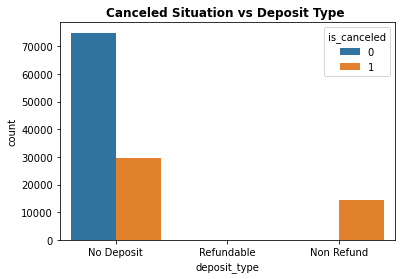

In [31]:
#Create a countplot based on Canceled Situation and Deposit Type column
sns.countplot('deposit_type', hue='is_canceled', data=df)
 
plt.title('Canceled Situation vs Deposit Type ', weight='bold')


C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


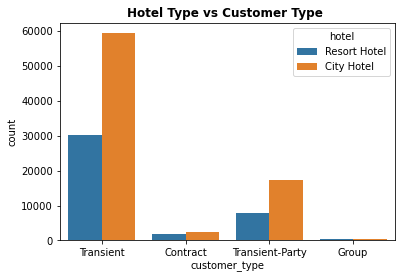

In [32]:
#Create a countplot based on Canceled Situation and Deposit Type column
plt.title('Hotel Type vs Customer Type ', weight='bold')
aw= sns.countplot('customer_type', hue='hotel', data=df,orient = 'v')
with_hue(aw,df['customer_type'],4,2)


<AxesSubplot:ylabel='distribution_channel'>

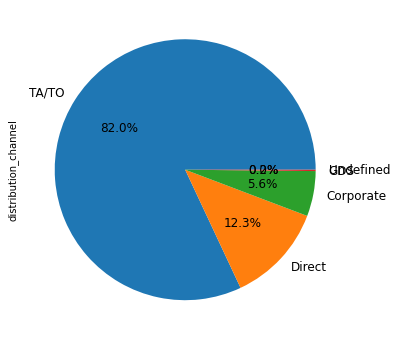

In [33]:
# Create a piechart based on distribution_channel
plt.figure(figsize=(16,6))
df['distribution_channel'].value_counts().plot.pie(autopct='%1.1f%%',textprops={'fontsize': 12})

In [34]:
df['distribution_channel'].value_counts()

TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


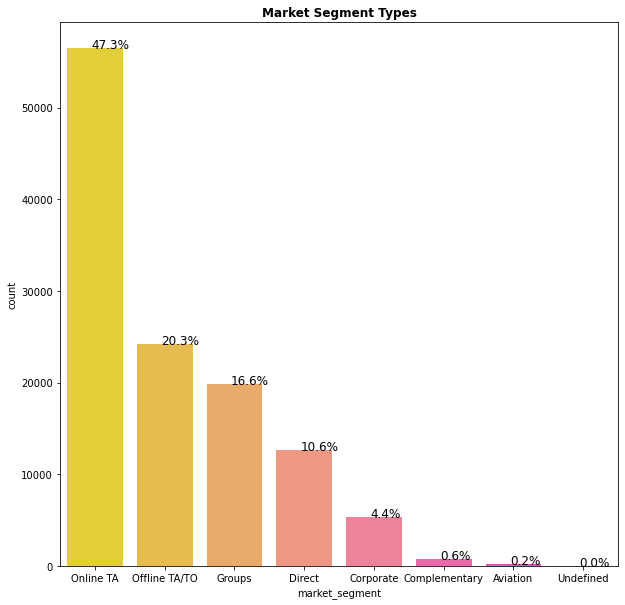

In [35]:
#Create a countplot based on market_segment column

plt.figure(figsize=(10,10))
ax= sns.countplot(df['market_segment'], palette='spring_r', 
              order=pd.value_counts(df['market_segment']).index)
plt.title('Market Segment Types', weight='bold')
without_hue(ax,df['market_segment'])


Text(0.5, 1.0, 'Market Segment Types vs Canceled Situation ')

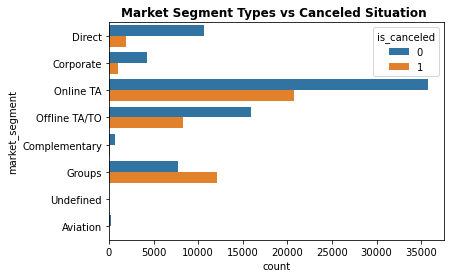

In [36]:
#Create a countplot based on market_segment and is_canceled column
sns.countplot(y='market_segment', hue='is_canceled', data=df)
plt.title('Market Segment Types vs Canceled Situation ', weight='bold')

Text(0.5, 1.0, 'Distribution Channel vs Canceled Situation ')

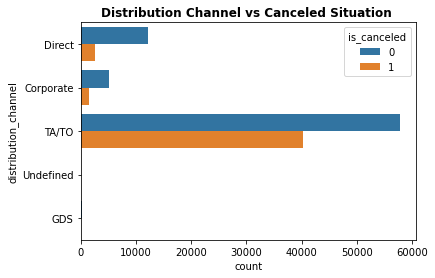

In [37]:
#Create a countplot based on distribution_channel and is_canceled column
sns.countplot(y='distribution_channel', hue='is_canceled', data=df)
plt.title('Distribution Channel vs Canceled Situation ', weight='bold')

Text(0.5, 1.0, 'Lead Time vs Market Segment Types')

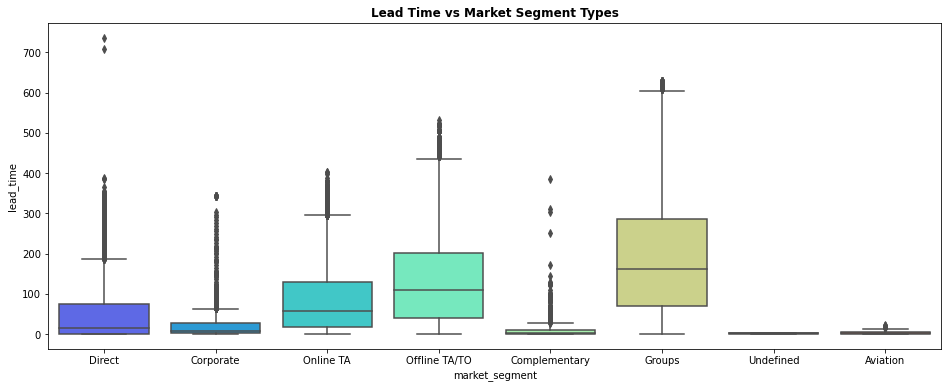

In [38]:
#Create a boxplot based on Market Segment Types and lead_time column

plt.figure(figsize=(16,6))
sns.boxplot(x='market_segment',y='lead_time',data=df,palette='rainbow')
plt.title('Lead Time vs Market Segment Types', weight='bold')

In [39]:
df['children'].describe()

count    119386.000000
mean          0.103890
std           0.398561
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.000000
Name: children, dtype: float64

In [40]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [41]:
df['babies'].value_counts()

0     118473
1        900
2         15
9          1
10         1
Name: babies, dtype: int64

In [42]:
df['kids']= df['children']+df['babies']

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


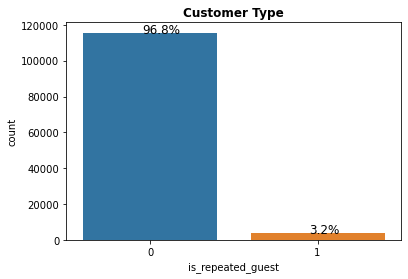

In [43]:
#Create a countplot based on Customer Type column
plt.title('Customer Type', weight='bold')
ax= sns.countplot('is_repeated_guest', data=df)
without_hue(ax,df['is_repeated_guest'])

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


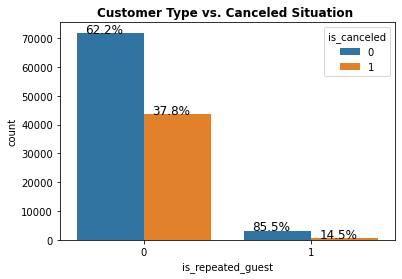

In [44]:
#Create a countplot based on Customer Type and is_cancel column
plt.title('Customer Type vs. Canceled Situation ', weight='bold')
ax=sns.countplot('is_repeated_guest', hue='is_canceled', data=df)
with_hue(ax,df['is_repeated_guest'],2,2)

In [45]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
# Minmax scaler
from sklearn.preprocessing import MinMaxScaler

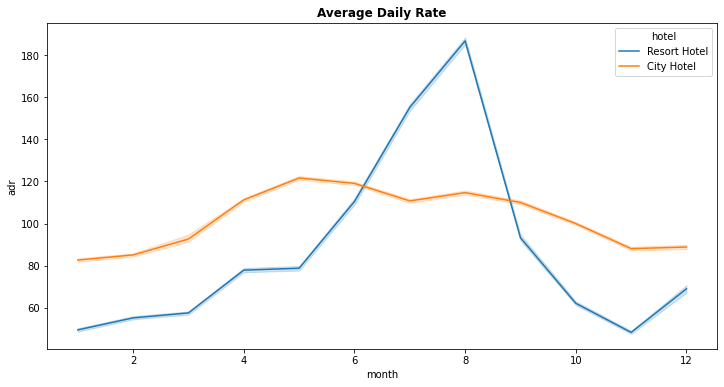

In [46]:
# Average daily rate

plt.figure(figsize=(12,6))
sns.lineplot(x='month', y='adr', hue='hotel', data= df)
plt.title('Average Daily Rate', weight='bold')
plt.show()

In [47]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
year                                   0
arrival_date_month                     0
arrival_date_week_number               0
day                                    0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [48]:
#drop column agent and company due to high missing values
df=df.drop(['agent','company'],axis=1)

In [49]:
df=df.drop(['reservation_status'],axis=1)

In [50]:
# filling the missing value
df['children'] =  df['children'].fillna(0)
df['kids'] =  df['kids'].fillna(0)

In [51]:
# drop null value rows of country
df.dropna(subset=['country'],inplace=True)

In [52]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
year                              0
arrival_date_month                0
arrival_date_week_number          0
day                               0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118902 non-null  object        
 1   is_canceled                     118902 non-null  int64         
 2   lead_time                       118902 non-null  int64         
 3   year                            118902 non-null  int64         
 4   arrival_date_month              118902 non-null  object        
 5   arrival_date_week_number        118902 non-null  int64         
 6   day                             118902 non-null  int64         
 7   stays_in_weekend_nights         118902 non-null  int64         
 8   stays_in_week_nights            118902 non-null  int64         
 9   adults                          118902 non-null  int64         
 10  children                        118902 non-null  float64

In [54]:
#Combine total mumbers by adding kids and adults
df['total_members'] = df['kids'] + df['adults']

In [55]:
#drop column agent and company due to high missing values
df=df.drop(['arrival_date_week_number'],axis=1)

In [56]:
#drop column agent and company due to high missing values
df=df.drop(['arrival_date_month'],axis=1)

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


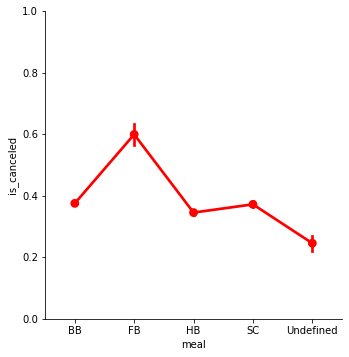

In [57]:
h = sns.PairGrid(data=df, x_vars=['meal'], y_vars='is_canceled', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


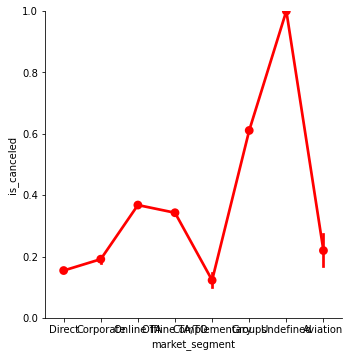

In [58]:
h = sns.PairGrid(data=df, x_vars=['market_segment'], y_vars='is_canceled', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


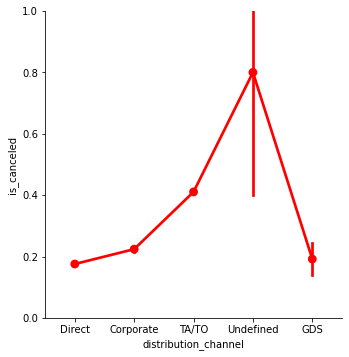

In [59]:
h = sns.PairGrid(data=df, x_vars=['distribution_channel'], y_vars='is_canceled', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


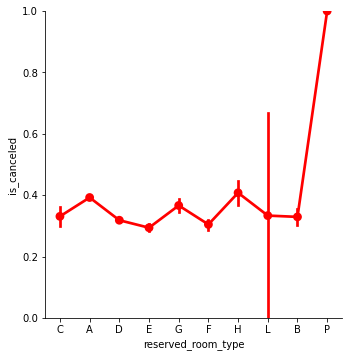

In [60]:
h = sns.PairGrid(data=df, x_vars=['reserved_room_type'], y_vars='is_canceled', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


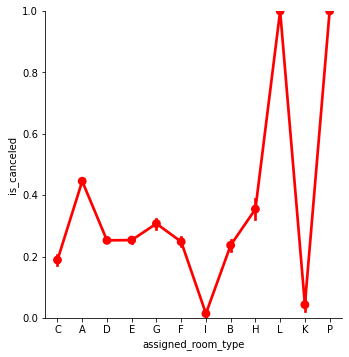

In [61]:
h = sns.PairGrid(data=df, x_vars=['assigned_room_type'], y_vars='is_canceled', size=5)
h.map(sns.pointplot, color="red")
h.set(ylim=(0, 1))

In [62]:
# check if assigned room type is same as reserved room type
def same_room_type(x):
    if x['reserved_room_type'] == x['assigned_room_type']:
        return 1
    return 0
df['same_room_type'] = df.apply(same_room_type, axis=1)

In [63]:
#encode hotel column
df['is_cityhotel']=df["hotel"].apply(lambda x: 1 if x== 'City Hotel' else 0)
df= df.drop ('hotel',axis=1)
df.head()

,is_canceled,lead_time,year,day,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,required_car_parking_spaces,total_of_special_requests,reservation_status_date,month,arrival_date,stays_total,kids,total_members,same_room_type,is_cityhotel
0,0,342,2015,1,0,0,2,0.0,0,BB,...,0,0,2015-07-01,7,2015-07-01,0,0.0,2.0,1,0
1,0,737,2015,1,0,0,2,0.0,0,BB,...,0,0,2015-07-01,7,2015-07-01,0,0.0,2.0,1,0
2,0,7,2015,1,0,1,1,0.0,0,BB,...,0,0,2015-07-02,7,2015-07-01,1,0.0,1.0,0,0
3,0,13,2015,1,0,1,1,0.0,0,BB,...,0,0,2015-07-02,7,2015-07-01,1,0.0,1.0,1,0
4,0,14,2015,1,0,2,2,0.0,0,BB,...,0,1,2015-07-03,7,2015-07-01,2,0.0,2.0,1,0


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     118902 non-null  int64         
 1   lead_time                       118902 non-null  int64         
 2   year                            118902 non-null  int64         
 3   day                             118902 non-null  int64         
 4   stays_in_weekend_nights         118902 non-null  int64         
 5   stays_in_week_nights            118902 non-null  int64         
 6   adults                          118902 non-null  int64         
 7   children                        118902 non-null  float64       
 8   babies                          118902 non-null  int64         
 9   meal                            118902 non-null  object        
 10  country                         118902 non-null  object 

In [65]:
# encode categorical variables
labelencoder = LabelEncoder()
df['meal'] = labelencoder.fit_transform(df['meal'])
df['market_segment']= labelencoder.fit_transform(df['market_segment'])
df['distribution_channel']= labelencoder.fit_transform(df['distribution_channel'])
df['reserved_room_type'] = labelencoder.fit_transform(df['reserved_room_type'])
df['assigned_room_type'] = labelencoder.fit_transform(df['assigned_room_type'])
df['deposit_type'] = labelencoder.fit_transform(df['deposit_type'])
df['customer_type']= labelencoder.fit_transform(df['customer_type'])
df['country']= labelencoder.fit_transform(df['country'])

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   is_canceled                     118902 non-null  int64         
 1   lead_time                       118902 non-null  int64         
 2   year                            118902 non-null  int64         
 3   day                             118902 non-null  int64         
 4   stays_in_weekend_nights         118902 non-null  int64         
 5   stays_in_week_nights            118902 non-null  int64         
 6   adults                          118902 non-null  int64         
 7   children                        118902 non-null  float64       
 8   babies                          118902 non-null  int64         
 9   meal                            118902 non-null  int32         
 10  country                         118902 non-null  int32  

Text(0.5, 1.0, 'df.corr()')

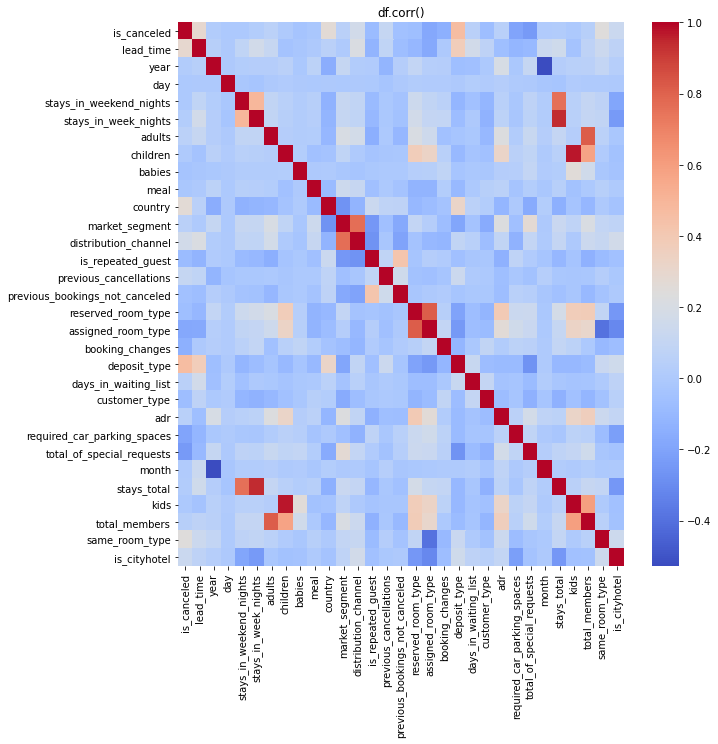

In [68]:
# finding high correlated variables
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='coolwarm')
plt.title('df.corr()')

In [69]:
# drop distribution channel keep market segment column
df=df.drop(['distribution_channel'],axis=1)

In [70]:
# drop children and babies column, keep kids column
df=df.drop(['children','babies'],axis=1)

In [71]:
# drop stays_in_weekend_nights and stays_in_week_nights column; keep  stays_total 
df=df.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1)

In [72]:
# drop total members; keep  adults and kids 
df=df.drop(['total_members'],axis=1)

In [73]:
# convert arrival date to day of week, drop arrival date.

import datetime
df['arrival_date'] = pd.to_datetime(df['arrival_date'])
df['arrival_day_of_week'] = df['arrival_date'].dt.dayofweek
df=df.drop('arrival_date', axis = 1)

In [74]:
# reservation status date is of little relevance as well, so we will drop that column
df=df.drop('reservation_status_date', axis = 1)

In [77]:
df.head()

,is_canceled,lead_time,year,day,adults,meal,country,market_segment,is_repeated_guest,previous_cancellations,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,month,stays_total,kids,same_room_type,is_cityhotel,arrival_day_of_week
0,0,342,2015,1,2,0,135,3,0,0,...,2,0.0,0,0,7,0,0.0,1,0,2
1,0,737,2015,1,2,0,135,3,0,0,...,2,0.0,0,0,7,0,0.0,1,0,2
2,0,7,2015,1,1,0,59,3,0,0,...,2,75.0,0,0,7,1,0.0,0,0,2
3,0,13,2015,1,1,0,59,2,0,0,...,2,75.0,0,0,7,1,0.0,1,0,2
4,0,14,2015,1,2,0,59,6,0,0,...,2,98.0,0,1,7,2,0.0,1,0,2


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118902 non-null  int64  
 1   lead_time                       118902 non-null  int64  
 2   year                            118902 non-null  int64  
 3   day                             118902 non-null  int64  
 4   adults                          118902 non-null  int64  
 5   meal                            118902 non-null  int32  
 6   country                         118902 non-null  int32  
 7   market_segment                  118902 non-null  int32  
 8   is_repeated_guest               118902 non-null  int64  
 9   previous_cancellations          118902 non-null  int64  
 10  previous_bookings_not_canceled  118902 non-null  int64  
 11  reserved_room_type              118902 non-null  int32  
 12  assigned_room_ty

In [79]:
#df.to_csv('Cleaned df.csv')

### Modeling

To start building out the models, we split out the target variable 'is_canceled' with other features. We also divide up data into training (80%) and testing data set (20%) to validate our models. 

In [80]:
X, y = df.drop(['is_canceled'], axis =1), df['is_canceled']

In [81]:
y

0         0
1         0
2         0
3         0
4         0
         ..
119385    0
119386    0
119387    0
119388    0
119389    0
Name: is_canceled, Length: 118902, dtype: int64

In [82]:
train_X, test_X, train_y, test_y = train_test_split(X,y, train_size = 0.8, test_size =0.2)

#### Decision Tree

One of the model we built is the Decision Tree model from sklearn. To help us identify good parameters for the model, we used the GridSerachCV funciton to help us pick the best comination of the "criteriaon", "max_depth" and "min_samples_leaf" among the range of values we've chosen. We've use the GridSearch several times to find the best combination of parameter values, and then update the range accordingly to see if there are better values. Please see below for the last GridSearch we performed that yield satisfying parameters (measured by accuracy of the model).

In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [84]:
dt = DecisionTreeClassifier()

In [85]:
param_map = {
    'criterion':('gini', 'entropy'), 
    "max_depth":[8,9,10,11],
    "min_samples_leaf":[0.01, 0.05,0.1]
}

In [86]:
gs = GridSearchCV(dt, param_map,cv = 5, n_jobs = 4)

In [87]:
gs.fit(train_X,train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [8, 9, 10, 11],
                         'min_samples_leaf': [0.01, 0.05, 0.1]})

In [88]:
gs.best_params_

{'criterion': 'entropy', 'max_depth': 11, 'min_samples_leaf': 0.01}

After we've decide on the model parameters, we use the DecisionTreeClassifier to fit our training data set. After that, we use the model to predict the label using the features in out testing data set and computed the accuracy score by comparing to the actual labels of the testing data set. In our case, we've obtained an accuracy score of 83%.

In [89]:
#Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(criterion='entropy',
                            max_depth=10,
                            min_samples_leaf=0.01,
                            random_state=3)
# Fit dt to the training set
dt.fit(train_X, train_y)

# Predict test set labels
y_pred = dt.predict(test_X)
print(y_pred[0:5])

[0 0 0 1 1]


In [90]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = dt.predict(test_X)

# Compute test set accuracy  
acc = accuracy_score(test_y, y_pred)
print("Test set accuracy of dt: {:.2f}".format(acc))

Test set accuracy of dt: 0.83


To make sure that our model doesn't have overfitting or underfitting issues, we then computed the accuracy score of the trainng data set as well as the cross validation scores. We got a training set accuracy score and cross validaition score of 83%. Since our testing, training and cross validation scores are all the same, it's a good indicator that we don't have overfitting or underfitting problems in our model. 

In [91]:
# Predict the labels of the training set
y_pred_train = dt.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train)

# Print RMSE_train
print('Train set accuracy of dt: {:.2f}'.format(acc_train))

Train set accuracy of dt: 0.83


In [92]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

In [93]:
cv_results = cross_validate(dt, train_X, train_y, cv=5)
cv_results['test_score']

array([0.82996058, 0.82947855, 0.82800673, 0.8254836 , 0.82406434])

In [94]:
f"Cross Valiation accuracy: {round(sum(cv_results['test_score'])/5,2)}"

'Cross Valiation accuracy: 0.83'

To take a closer look at the model performance, we print out the Confusion Matrix and the Accuracy, Precision and Recall scores. Precision which is stating that the of the cancelations the model predicted, 80% of them actually cancelled. Recall which is stating that model is 70% sensitive to predict cancellations from guests who actually cancelled. 


In [95]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

array([[13407,  1527],
       [ 2626,  6221]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

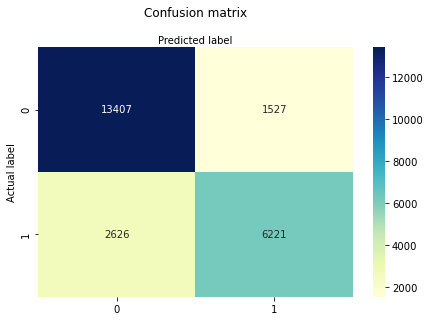

In [96]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [97]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("Precision:",metrics.precision_score(test_y, y_pred))
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.8253647870148438
Precision: 0.8029168817759422
Recall: 0.7031762179269809


Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. 1 is good, perfect classification. 0.5 is worthless.

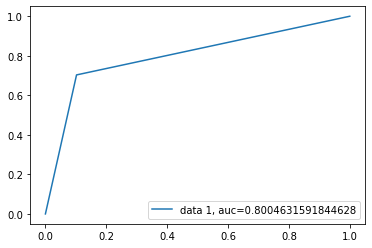

In [98]:
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred)
auc = metrics.roc_auc_score(test_y,  y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

For Decision Tree Models we can also understand the feature imporatnces of all our features. It looks like the most importart feature by large is the deposit_type which agrees our intuition that if a guest put down deposit he or she is less likely to cancel the hotel room. 

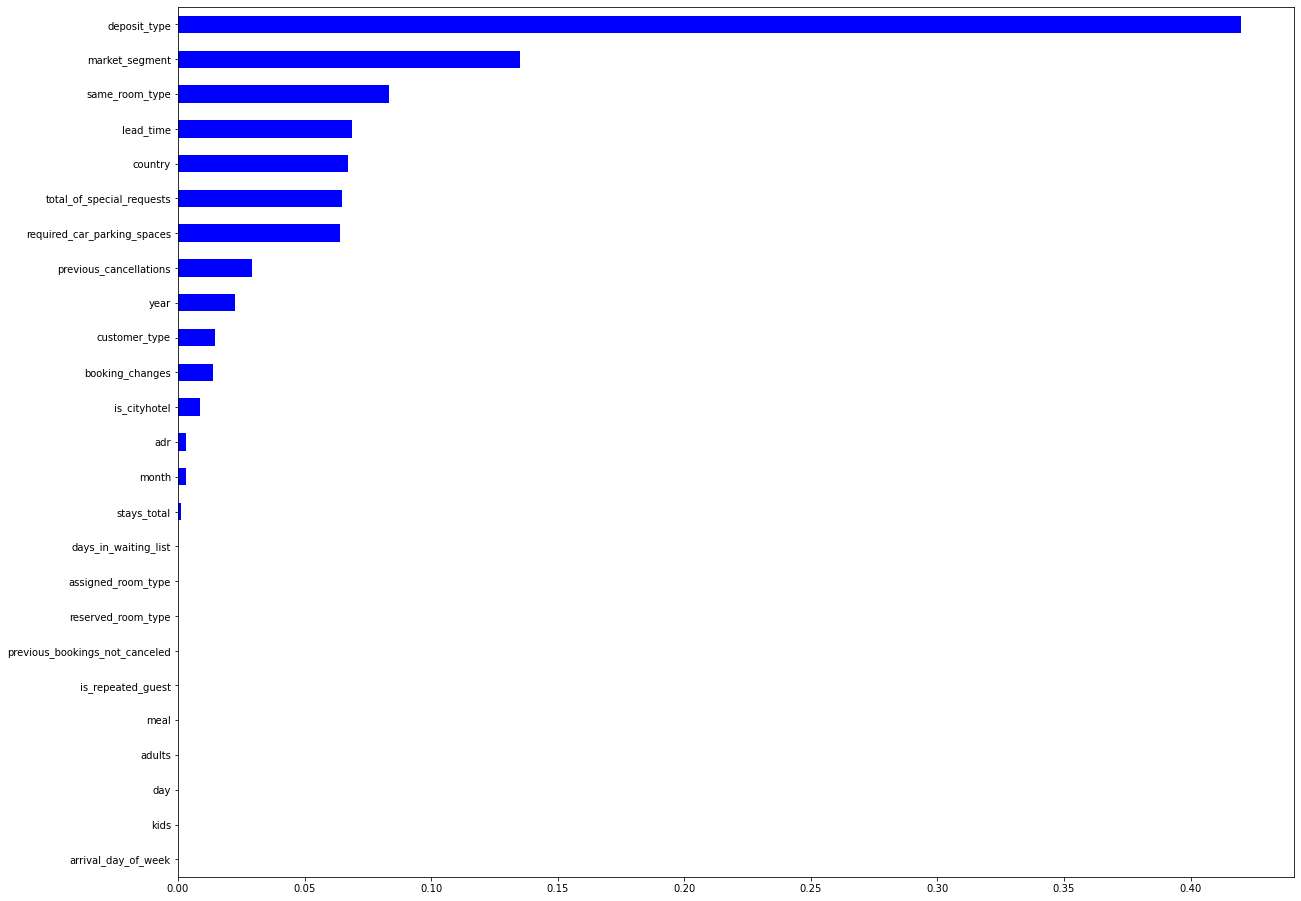

In [99]:
# Create a pd.Series of features importances
importances_dt = pd.Series(dt.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_dt = importances_dt.sort_values()
# Make a horizontal bar plot
sorted_importances_dt.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

We could also see the nodes and leafs of the Decision Tree to understand the detailed classificaiton steps it took. 

In [100]:
from sklearn.tree import export_text

r = export_text(dt, feature_names=list(X.columns))
print(r)

|--- deposit_type <= 0.50
|   |--- same_room_type <= 0.50
|   |   |--- country <= 134.50
|   |   |   |--- market_segment <= 5.50
|   |   |   |   |--- lead_time <= 98.50
|   |   |   |   |   |--- market_segment <= 4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- market_segment >  4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- lead_time >  98.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- market_segment >  5.50
|   |   |   |   |--- lead_time <= 17.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- lead_time >  17.50
|   |   |   |   |   |--- class: 0
|   |   |--- country >  134.50
|   |   |   |--- lead_time <= 74.50
|   |   |   |   |--- total_of_special_requests <= 0.50
|   |   |   |   |   |--- lead_time <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- lead_time >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- total_of_special_requests >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- lead_ti

#### Random Forest

Another model we built is the Random Forest model from sklearn. To help us identify good parameters for the model, we used the GridSerachCV funciton to help us pick the best comination of the "max_depth" and "min_samples_leaf" among the range of values we've chosen. We've use the GridSearch several times to find the best combination of parameter values, and then update the range accordingly to see if there are better values. Please see below for the last GridSearch we performed that yield satisfying parameters (measured by accuracy of the model).

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [102]:
param_map = {
    "max_depth":[9,10,11],
    "min_samples_leaf":[0.01,0.05,0.1]
}

In [103]:
gs = GridSearchCV(rf, param_map,cv = 5, n_jobs = 4)

In [104]:
gs.fit(train_X,train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [9, 10, 11],
                         'min_samples_leaf': [0.01, 0.05, 0.1]})

In [105]:
gs.best_params_

{'max_depth': 11, 'min_samples_leaf': 0.01}

After we've decide on the model parameters, we use the RandomForestClassifier to fit our training data set. After that, we use the model to predict the label using the features in out testing data set and computed the accuracy score by comparing to the actual labels of the testing data set. In our case, we've obtained an accuracy score of 83%.

To make sure that our model doesn't have overfitting or underfitting issues, we then computed the accuracy score of the trainng data set as well as the cross validation scores. We got a training set accuracy score of 82% and cross validaition score of 82%. Since our testing, training and cross validation scores are the same, it's a good indicator that we don't have overfitting or underfitting problems in our model. 

In [106]:
from sklearn.ensemble import RandomForestClassifier

# Set seed for reproducibility
SEED = 1

# Instantiate a random forests regressor 'rf' 400 estimators
rf = RandomForestClassifier(n_estimators=400,
                            max_depth= 11,
                            min_samples_leaf=0.01,
                            random_state=SEED)

# Fit 'rf' to the training set
rf.fit(train_X, train_y)

# Predict the test set labels 'y_pred'
y_pred = rf.predict(test_X)
y_pred_train=rf.predict(train_X)

# Evaluate the test set RMSE
acc_test = accuracy_score(test_y, y_pred)
acc_train = accuracy_score(train_y, y_pred_train)

# Print the test set RMSE
print('Test set accuracy of rf: {:.2f}'.format(acc_test))
print('Train set accuracy of rf: {:.2f}'.format(acc_train))

Test set accuracy of rf: 0.82
Train set accuracy of rf: 0.82


In [107]:
cv_results = cross_validate(rf, train_X, train_y, cv=5)
cv_results['test_score']

array([0.8288042 , 0.82716569, 0.8232233 , 0.81954373, 0.8220143 ])

In [108]:
f"Cross Valiation accuracy: {round(sum(cv_results['test_score'])/5,2)}"

'Cross Valiation accuracy: 0.82'

To take a closer look at the model performance, we print out the Confusion Matrix and the Accuracy, Precision and Recall scores. Precision which is stating that the of the cancelations the model predicted, 88% of them actually cancelled. Recall which is stating that model is 60% sensitive to predict cancellations from guests who actually cancelled. While the Precision score of the Random Forest is higher than the Decision Tree, the Recall score is lower.


In [109]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

array([[14185,   749],
       [ 3569,  5278]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

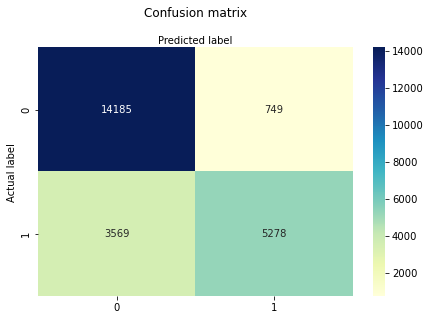

In [110]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [111]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("Precision:",metrics.precision_score(test_y, y_pred))
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.8184264749169505
Precision: 0.875725900116144
Recall: 0.5965864134734938


Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity. 1 is good, perfect classification. 0.5 is worthless.

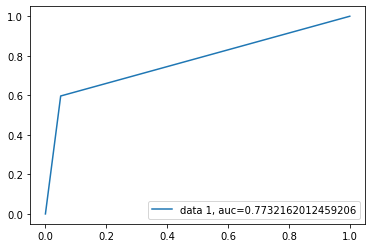

In [112]:
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred)
auc = metrics.roc_auc_score(test_y,  y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

For RandomForest Models we can also understand the feature imporatnces of all our features. It looks like the most importart feature by large is the deposit_type which agrees our intuition that if a guest put down deposit he or she is less likely to cancel the hotel room. 

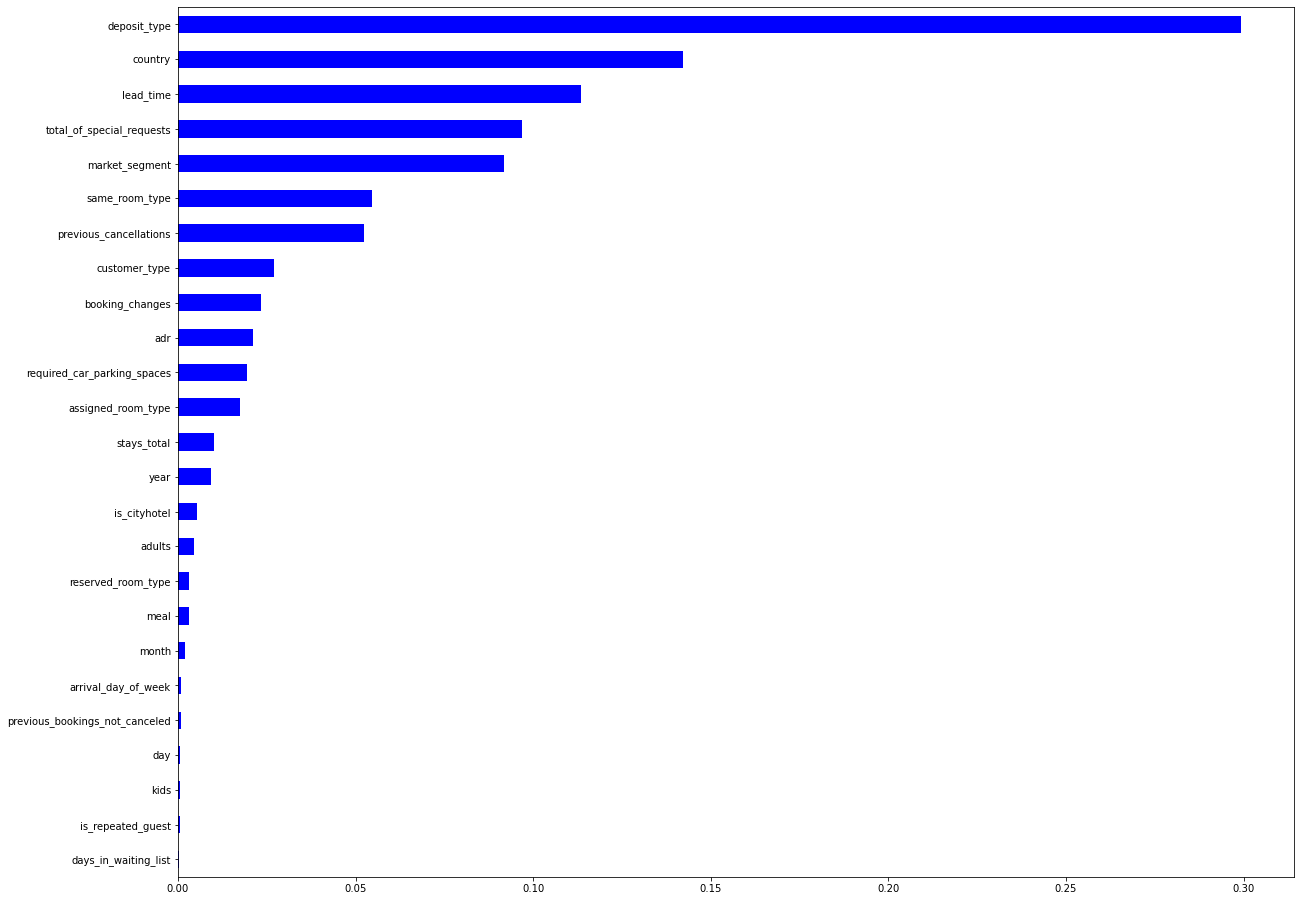

In [113]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

### Logistic Regression

In [114]:
from sklearn.linear_model import LogisticRegression

logReg=LogisticRegression(solver='lbfgs', max_iter=5000)

logReg.fit(train_X, train_y)

y_pred = logReg.predict(test_X)


#### Increased max_iter because there was a convergance warning

In [115]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = logReg.predict(test_X)

# Compute test set accuracy  
acc = accuracy_score(test_y, y_pred)
print("Test set accuracy of Log: {:.2f}".format(acc))

Test set accuracy of Log: 0.79


In [116]:
# Predict the labels of the training set
y_pred_train = logReg.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train)

# Print RMSE_train
print('Train set accuracy of Log: {:.2f}'.format(acc_train))

Train set accuracy of Log: 0.79


In [117]:
import warnings
warnings.filterwarnings("ignore")
cv_results = cross_validate(logReg, train_X, train_y, cv=5)
cv_results['test_score']

array([0.79626807, 0.79457527, 0.79404962, 0.79252523, 0.79320858])

In [118]:
f"Cross Valiation accuracy: {round(sum(cv_results['test_score'])/5,2)}"

'Cross Valiation accuracy: 0.79'

In [119]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

array([[13789,  1145],
       [ 3764,  5083]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

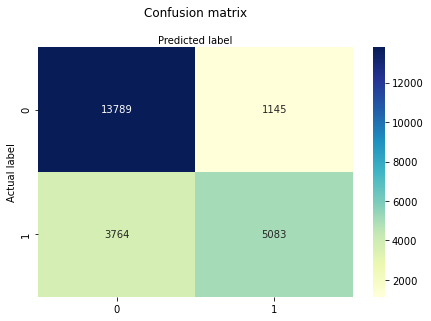

In [120]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [121]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("Precision:",metrics.precision_score(test_y, y_pred))
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.7935747024935873
Precision: 0.8161528580603725
Recall: 0.5745450435175766


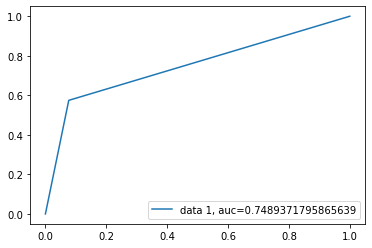

In [122]:
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred)
auc = metrics.roc_auc_score(test_y,  y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [123]:
Log_importance = logReg.coef_[0]
Log_importance

array([ 2.98890216e-03, -3.03667791e-03, -9.66207839e-04,  1.43060565e-01,
       -1.58113215e-02,  1.09347850e-02,  4.30412294e-01, -3.88392349e-01,
        2.08799522e+00, -3.17313001e-01,  5.67137828e-02, -7.85094945e-02,
       -3.66825247e-01,  3.66429970e+00, -3.55318391e-03, -9.22334985e-02,
        5.41102988e-03, -3.21505885e+00, -6.25054506e-01, -1.92537690e-02,
        3.25939730e-02,  1.38154086e-01,  1.64499967e+00,  8.41065692e-02,
        1.95400240e-02])

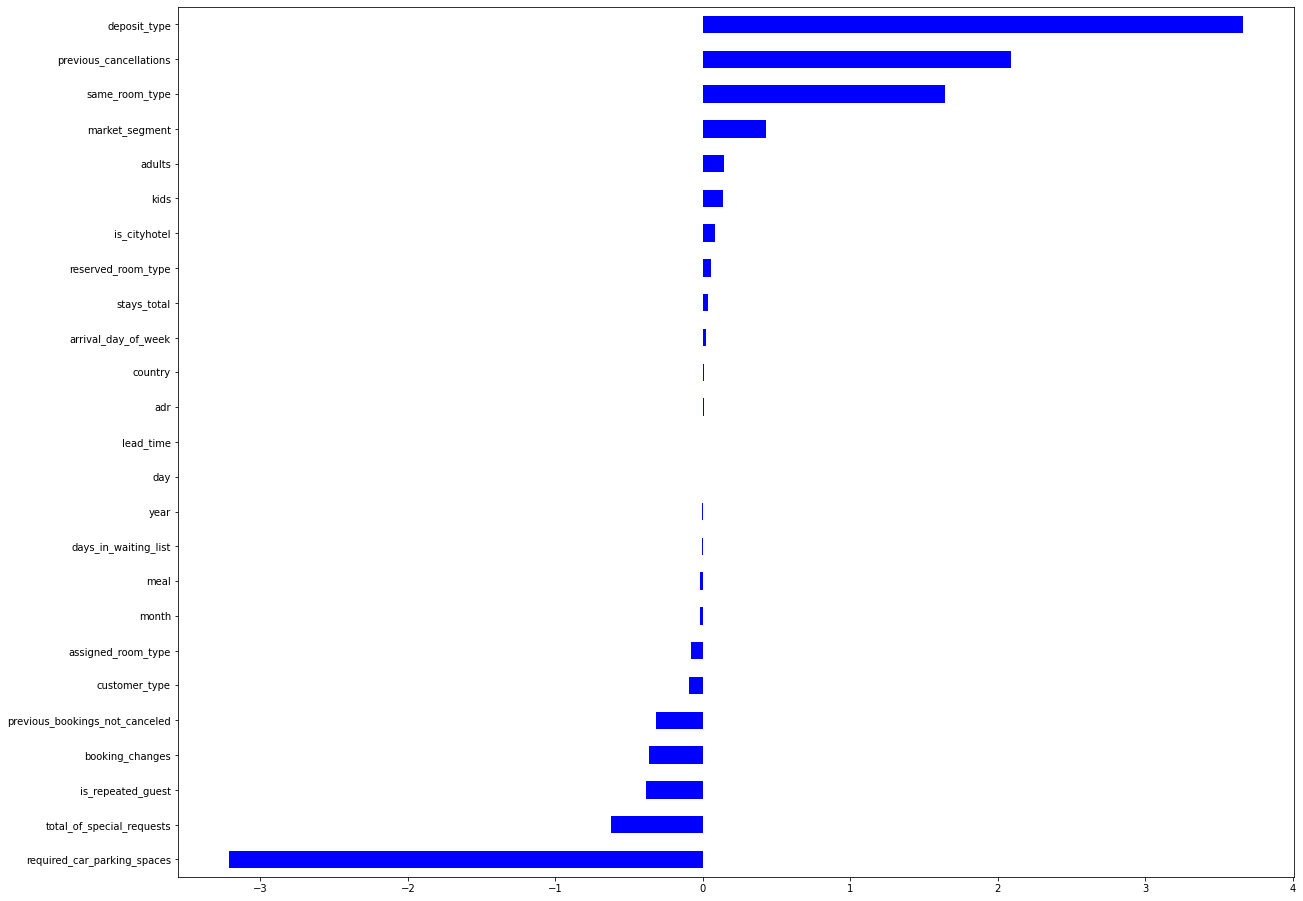

In [124]:
# Create a pd.Series of features importances
importances_log = pd.Series(Log_importance,
index = X.columns)
# Sort importances
sorted_importances_log = importances_log.sort_values()
# Make a horizontal bar plot
sorted_importances_log.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

There are some questionable choices for feature selection, most of the most influential were of low occurance. If we are fitting on data with very few of the important features, which would be more typical in a real world sense, the model would be a poor fit more often than not.

### CatBoost 

CatBoost is model that is based on gradient boosted decision trees. A set of decision trees is built consecutively during training where each successive tree is built with reduced loss compared to the previous trees.

In [125]:
#conda config --add channels conda-forge

In [126]:
#conda install catboost

In [ ]:
from catboost import CatBoostClassifier
model_cb = CatBoostClassifier()
model_cb.fit(train_X, train_y)

In [128]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred = model_cb.predict(test_X)

# Compute test set accuracy  
acc = accuracy_score(test_y, y_pred)
print("Test set accuracy of CatBoost: {:.2f}".format(acc))

Test set accuracy of CatBoost: 0.88


In [129]:
# Predict the labels of the training set
y_pred_train = model_cb.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train)

# Print RMSE_train
print('Train set accuracy of CatBoost: {:.2f}'.format(acc_train))

Train set accuracy of CatBoost: 0.89


In [ ]:
cv_results = cross_validate(model_cb, train_X, train_y, cv=5)
cv_results['test_score']

In [131]:
f"Cross Valiation accuracy: {round(sum(cv_results['test_score'])/5,2)}"

'Cross Valiation accuracy: 0.88'

In [132]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

array([[13734,  1200],
       [ 1768,  7079]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

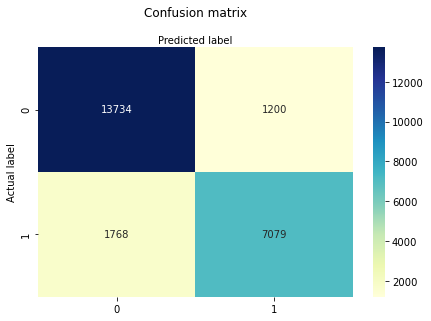

In [133]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [134]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("Precision:",metrics.precision_score(test_y, y_pred))
print("Recall:",metrics.recall_score(test_y, y_pred))

Accuracy: 0.8751944829906227
Precision: 0.8550549583283005
Recall: 0.8001582457330169


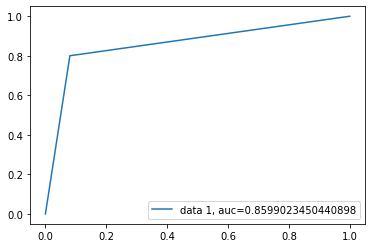

In [135]:
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred)
auc = metrics.roc_auc_score(test_y,  y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

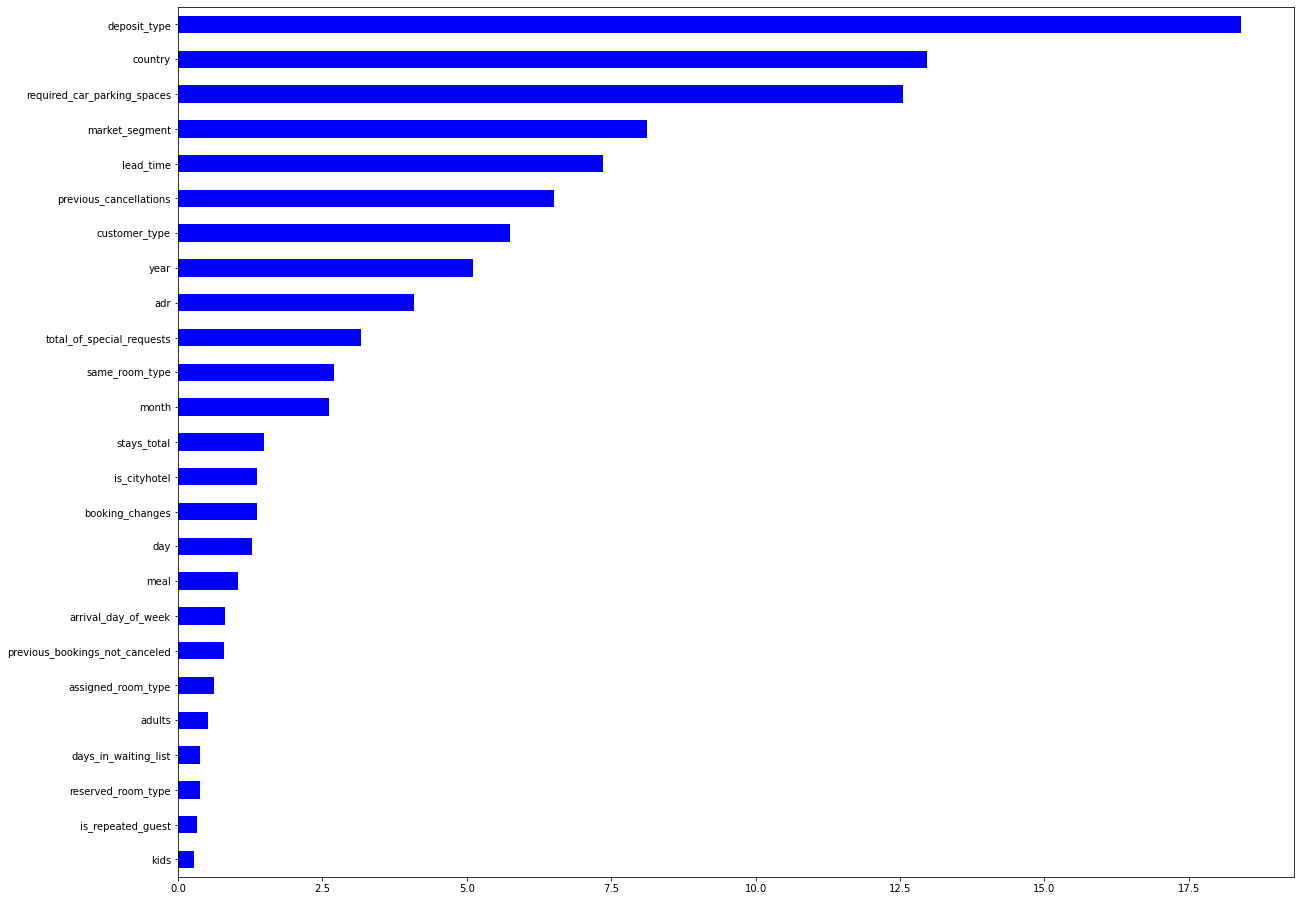

In [136]:
# Create a pd.Series of features importances
importances_rf = pd.Series(model_cb.feature_importances_,
index = X.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

### Shap Value Plot

The SHAP value plot can further show the positive and negative relationships of the predictors with the target variable. What SHAP does is quantifying the contribution that each feature brings to the prediction made by the model. SHAP values interpret the impact of having a certain value for a given feature in comparison to the prediction we'd make if that feature took some baseline value.

In [137]:
conda install -c conda-forge shap

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


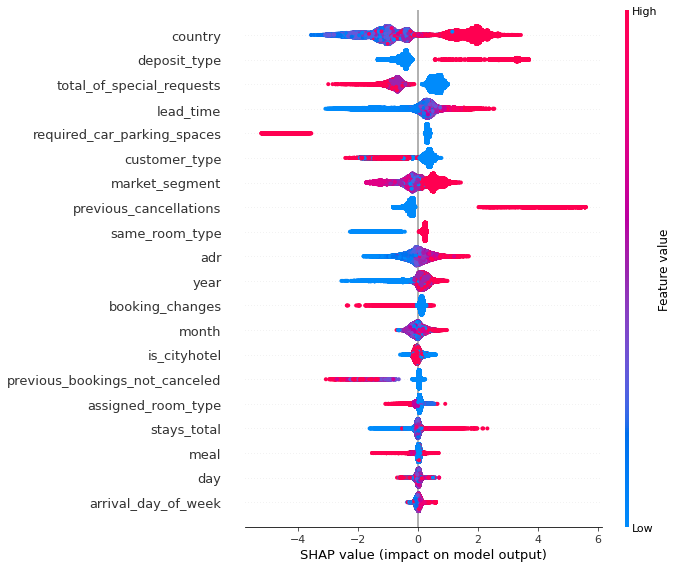

In [138]:
import shap
shap_values = shap.TreeExplainer(model_cb).shap_values(train_X)
shap.summary_plot(shap_values, train_X)

The country of a Reservation has a high probability of being cancelled. Depending on the country, the chances of a reservation being cancelled is the highest among other features. However, this result has to be interpreted with caution because in real life, we don't always have the nationality of the person until they check in to the hotel.

### Gradient Boost

Another model we built is Gradient Boost from sklearn. Gradient Boost is widely used in the data science world. To help us identify the best parameters for the model, we used the RandomizedSearchCV funciton to help us pick the best comination of 'max_depth', 'max_features','n_estimators', 'min_samples_split', 'min_samples_leaf', and 'learning_rate' among the lists of values we've chosen. We used the RandomizedSearch several times to find the best combination of parameter values, and then update the range accordingly to see if there are better values. Please see below for the lastest RandomizedSearch we performed that yield satisfying parameters (measured by accuracy of the model).

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

In [ ]:
# Number of features to consider at every split
n_estimators = [int(x) for x in np.linspace(10, 30, num = 1)]

# learning rate options
learning_rate = [0.1,0.01,1,0.5]

# Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 20, num = 20)]

# Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(1, 20, num = 20)]

# Maximum of features
max_features = [int(x) for x in np.linspace(1, 15, num = 15)]

# Maximum depth of a tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

# Create the GB grid
gb_grid = {'n_estimators': n_estimators,
           'learning_rate': learning_rate,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
           'max_features': max_features,
           'max_depth': max_depth}

# Use the gb grid to search for best hyperparameters
# First create the base model to tune
gb = GradientBoostingClassifier()

# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = gb_grid, n_iter = 100, cv = 5, verbose=0,scoring='accuracy',
random_state=SEED, n_jobs = -1)

# Fit the random search model
gb_random.fit(train_X, train_y)

In [ ]:
gb_random.best_params_

In [ ]:
#Fit GB Classifer
gb = GradientBoostingClassifier(n_estimators=10, learning_rate=.5, min_samples_split=12,
                               min_samples_leaf=4, max_features=13, max_depth=10, random_state=SEED)

# using best parameters when scoring = recall
#gb = GradientBoostingClassifier(n_estimators=10, learning_rate=.1, min_samples_split=8,
#                                min_samples_leaf=16, max_features=15, max_depth=10, random_state=SEED)

gb.fit(train_X,train_y)

In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred_gb = gb.predict(test_X)

# Compute test set accuracy  
acc = accuracy_score(test_y, y_pred_gb)
print("Test set accuracy of GBM: {:.5f}".format(acc))

In [ ]:
# Predict the labels of the training set
y_pred_train_gb = gb.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train_gb)

# Print RMSE_train
print('Train set accuracy of GBM: {:.5f}'.format(acc_train))

In [ ]:
# calculate CV accuracy score
Accuracy_CV_scores = cross_val_score(gb, train_X, train_y, cv=5,
                                     scoring='accuracy',
                                     n_jobs=-1)

print("GBM Accuracy score (CV): {0:.5f}".format(Accuracy_CV_scores.mean()))

In [ ]:
# print the confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred_gb)
cnf_matrix

In [ ]:
# plot the confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_gb))
print("Precision:",metrics.precision_score(test_y, y_pred_gb))
print("Recall:",metrics.recall_score(test_y, y_pred_gb))

In [ ]:
# Create a pd.Series of features importances
importances_gb = pd.Series(gb.feature_importances_,
index = X.columns)
# Sort importances_gb
sorted_importances_gb = importances_gb.sort_values()
# Make a horizontal bar plot
sorted_importances_gb.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

In [ ]:
# another way of ploting feature importance
gb_feature_importances = pd.DataFrame(list(zip(train_X.columns.values, gb.feature_importances_)),
                                       columns =['Feafure', 'Importance'])
gb_feature_importances=gb_feature_importances.sort_values(by=['Importance'], ascending=False)

In [ ]:
gb_feature_importances

In [ ]:
# method 2 of plotting feature importance. This only acts as an alternative to put on the presentation slides
fig, ax = plt.subplots()
fig.set_size_inches(28, 10)
sns.set(font_scale = 1.3)
gbfi = sns.barplot(x="Feafure", y="Importance", data=gb_feature_importances)
fig.autofmt_xdate()

from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(gbfi)

### XG Boost

XGBoost, also known as extreme gradient boosting, dominates structured or tabular datasets on classification problems and is a broadly used algorithm for data science project. To help us identify the best parameters for the model, we used the RandomizedSearchCV funciton to help us pick the best comination of 'subsample', 'min_child_weight', 'max_depth', 'gamma', and 'colsample_bytree' among the lists of values we've chosen. We used the RandomizedSearch several times to find the best combination of parameter values, and then update the range accordingly to see if there are better values. Please see below for the lastest RandomizedSearch we performed that yield satisfying parameters (measured by accuracy of the model).

In [ ]:
# Gamma, the larger the more conervative
gamma = [0.01,0.1,0.5,1,2,3,5,10]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]

# Minimum sum of instance weight (hessian) needed in a child.
min_child_weight = [int(x) for x in np.linspace(1, 10, num = 10)]

# Subsample ratio of the training instances.
subsample = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Subsample ratio of columns when constructing each tree
colsample_bytree = [float(x) for x in np.linspace(0.1, 1, num = 10)]

# Create the XGB grid
xgb_grid = {'gamma': gamma,
            'max_depth': max_depth,
            'min_child_weight': min_child_weight,
            'subsample': subsample,
            'colsample_bytree': colsample_bytree}

# Use the XGB grid to search for best hyperparameters
# First create the base model to tune
xgb = XGBClassifier()

# Random search of parameters, using 5 fold cross validation,
# search across 100 different combinations, and use all available cores
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = xgb_grid, n_iter = 100, cv = 5, verbose=0,scoring='accuracy', random_state=SEED, n_jobs = -1)

# Fit the random search model
xgb_random.fit(train_X, train_y)

In [ ]:
xgb_random.best_params_

In [ ]:
#Fit XGB Classifer
xgb = XGBClassifier(gamma=3, max_depth=8, min_child_weight=1, subsample=0.9, colsample_bytree=1.0, random_state=SEED)
#xgb = XGBClassifier()
xgb.fit(train_X,train_y)

In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score

# Predict test set labels
y_pred_xgb = xgb.predict(test_X)

# Compute test set accuracy  
acc = accuracy_score(test_y, y_pred_xgb)
print("Test set accuracy of XGB: {:.5f}".format(acc))

In [ ]:
# Predict the labels of the training set
y_pred_train_xgb = xgb.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train_xgb)

# Print RMSE_train
print('Train set accuracy of XGB: {:.5f}'.format(acc_train))

In [ ]:
Accuracy_CV_scores = cross_val_score(xgb, train_X, train_y, cv=5,
                                     scoring='accuracy',
                                     n_jobs=-1)

print(Accuracy_CV_scores)
print("XGB Accuracy score (CV): {0:.3f}".format(Accuracy_CV_scores.mean()))

In [ ]:
# print confusion matrix
cnf_matrix = metrics.confusion_matrix(test_y, y_pred_xgb)
cnf_matrix

In [ ]:
# plot confusion matrix
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred_xgb))
print("Precision:",metrics.precision_score(test_y, y_pred_xgb))
print("Recall:",metrics.recall_score(test_y, y_pred_xgb))

In [ ]:
# Create a pd.Series of features importances
importances_xgb = pd.Series(xgb.feature_importances_,
index = X.columns)
# Sort importances_xgb
sorted_importances_xgb = importances_xgb.sort_values()
# Make a horizontal bar plot
sorted_importances_xgb.plot(kind='barh', color='blue',figsize=(20,16))
plt.show()

In [ ]:
# another way of finding feature importance
xgb_feature_importances = pd.DataFrame(list(zip(train_X.columns.values,xgb.feature_importances_)),
                                       columns =['Feafure', 'Importance'])
xgb_feature_importances=xgb_feature_importances.sort_values(by=['Importance'], ascending=False)

In [ ]:
xgb_feature_importances

In [ ]:
# method 2 of plotting feature importance. This only acts as an alternative to put on the presentation slides
fig, ax = plt.subplots()
fig.set_size_inches(28, 10)
sns.set(font_scale = 1.3)
ax = sns.barplot(x="Feafure", y="Importance", data=xgb_feature_importances)
fig.autofmt_xdate()

from matplotlib import pyplot as plt
import numpy as np

def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

show_values_on_bars(ax)

#### Voting Classifier

Finally, we ran an emsemble learning to get the best results. In our case, we used voting classifier to ensemble the six models we and use it to predict the canellation. As we can see, the hard voting classifer yields a result of 86% accuracy while the soft voting classifer yields a resutl of 87%. Both are better than most individual models along. To check for overfitting or underfitting issues, we also ran the voting classifier on the train data set and ran cross validation. Since the test, train and cross validation accuracy all around 87-88%, there's no sign of overfitting or underfitting in our model. 

Other than Accuracy, the voting classifier also yields good precision and recall scores. Precision which is stating that the of the cancelations the model predicted, 88% of them actually cancelled. Recall which is stating that model is 75% sensitive to predict cancellations from guests who actually cancelled. 


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
import numpy as np



# Set seed for reproducibility
SEED=1

# Logitstic Regression
logReg=LogisticRegression(solver='lbfgs', max_iter=4000)

# KNN
knn = KNeighborsClassifier(n_neighbors=2)

# Define the list classifiers
classifiers = [('Logistics Regression', logReg),
               ('CatBoost', model_cb),
               ('Classification Tree', dt), 
               ('Random Forest',rf),
               ('Gradient Boost', gb), 
               ('XGBoost', xgb)]

In [ ]:
# Import accuracy_score
from sklearn.metrics import accuracy_score
for clf_name, clf in classifiers:    
  
    # Fit clf to the training set
    clf.fit(train_X, train_y)    
  
    # Predict y_pred
    y_pred = clf.predict(test_X)
    
    # Calculate accuracy
    accuracy = accuracy_score(test_y, y_pred)
  
    # Evaluate clf's accuracy on the test set
    print('{:s} : {:.3f}'.format(clf_name, accuracy))

In [ ]:
# Import VotingCLassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers, voting='hard')     

# Fit vc to the training set
vc.fit(train_X, train_y)   

# Evaluate the test set predictions
y_pred = vc.predict(test_X)

# Calculate accuracy score
accuracy = accuracy_score(test_y, y_pred)


In [ ]:
print('Hard Voting Classifier: {:.3f}'.format(accuracy))

In [ ]:
# Import VotingCLassifier from sklearn.ensemble
from sklearn.ensemble import VotingClassifier

# Instantiate a VotingClassifier vc 
vc = VotingClassifier(estimators=classifiers, voting='soft')     

# Fit vc to the training set
vc.fit(train_X, train_y)   

# Evaluate the test set predictions
y_pred = vc.predict(test_X)

# Calculate accuracy score
accuracy = accuracy_score(test_y, y_pred)


In [ ]:
print('Soft Voting Classifier: {:.3f}'.format(accuracy))

In [ ]:
# Predict the labels of the training set
y_pred_train = vc.predict(train_X)

# Evaluate the training set RMSE of dt
acc_train = accuracy_score(train_y, y_pred_train)

# Print RMSE_train
print('Train set accuracy of dt: {:.2f}'.format(acc_train))

In [ ]:
import warnings
warnings.filterwarnings("ignore")
cv_results = cross_validate(vc, train_X, train_y, cv=5)
cv_results['test_score']

In [ ]:
f"Cross Valiation accuracy: {round(sum(cv_results['test_score'])/5,2)}"

In [ ]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(test_y, y_pred)
cnf_matrix

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
print("Precision:",metrics.precision_score(test_y, y_pred))
print("Recall:",metrics.recall_score(test_y, y_pred))

In [ ]:
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred)
auc = metrics.roc_auc_score(test_y,  y_pred)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()